# **Project Description:Twitter US Airline Sentiment**
 
# **Data Description**:

- A sentiment analysis job about the problems of each major U.S. airline.
- Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

# **Dataset**:

- The project is from a dataset from Kaggle.
- Link to the Kaggle project site:https://www.kaggle.com/crowdflower/twitter-airline-sentiment
- The dataset has to be downloaded from the above Kagglewebsite.

# **Objective**:

- To classify the sentiment of tweets into the positive, neutral & negative.

# **Learning Outcomes**:
- Text based EDA
- Basic understanding of text pre-processing.
- What to do after text pre-processing:
    - Bag of words
    - Tf-idf
- Build the classification model.
- Tune & Evaluate the Model performance.
- Plot the  important features after training the model.

### Importing the necessary libraries

In [3]:
# install and import necessary libraries.

!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.
import seaborn as sns                                   # Import seaborn
import matplotlib.pyplot as plt                         # Import Matplotlib 

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.   
from wordcloud import WordCloud,STOPWORDS               # Import WorldCloud and Stopwords    
from sklearn.feature_extraction.text import CountVectorizer # Import count Vectorizer 
from sklearn.model_selection import train_test_split    # Import train test split      
from sklearn.ensemble import RandomForestClassifier     # Import Rndom Forest Classifier
from sklearn.model_selection import cross_val_score     # Import cross val score    
from sklearn.metrics import confusion_matrix            # Import confusion matrix
from wordcloud import WordCloud                         # Import Word Cloud
from sklearn.feature_extraction.text import TfidfVectorizer # Import Tf-Idf vector
import nltk
nltk.download('omw-1.4')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### Reading the dataset

In [4]:
# Mount Google drive to access the dataset in colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# read the data
path_csv = '/content/drive/MyDrive/02. Artificial Inteligence and Machine Learning/05. Introduction to Natural Language Processing/03. Project/Tweets.csv'

# Complete the code to read the dataset
data = pd.read_csv(path_csv)            



### Checking the shape of the dataset

In [6]:
# Code to get the shape of data
data.shape                     

(14640, 15)

### Displaying the first few rows of the dataset

In [7]:
# Code to display the first 25 rows of the dataset
data.head(25)                           

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


### Checking for missing values

In [8]:
# Code to check duplicate entries in the data

#We try to find duplicate values especially for the Text subset as there is our the crucial point
data.duplicated(subset=['text']).value_counts()


False    14427
True       213
dtype: int64

In [10]:
# Code to check duplicate entries in the Text field
Text_Dup = data[data['text'].duplicated()]
Text_Dup.head(25)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
331,568605449659895808,positive,0.6482,NaN,NaN,Virgin America,NaN,SuuperG,NaN,0,@VirginAmerica Thanks!,NaN,2015-02-19 18:57:58 -0800,Wandering So-Cal-ian,Pacific Time (US & Canada)
515,570299889688702976,positive,0.6634,NaN,NaN,United,NaN,nydia376,NaN,0,@united thanks,NaN,2015-02-24 11:11:04 -0800,USA,NaN
1477,569705563287896064,positive,0.6629,NaN,NaN,United,NaN,tiamariaroxs,NaN,0,@united thank you!,NaN,2015-02-22 19:49:25 -0800,NaN,NaN
1864,569545805826166784,positive,0.3512,NaN,0.0000,United,NaN,worldknits,NaN,0,@united thank you,NaN,2015-02-22 09:14:36 -0800,"Fredericksburg, VA",Eastern Time (US & Canada)
1938,569513703722393601,positive,1.0000,NaN,NaN,United,NaN,Angry_VBK,NaN,0,@united thank you,NaN,2015-02-22 07:07:02 -0800,NaN,NaN
1969,569500986638798848,positive,1.0000,NaN,NaN,United,NaN,GreenkidspenWRA,NaN,0,@united thank you!,NaN,2015-02-22 06:16:30 -0800,Grimsby - UK,NaN
2285,569276207696453632,positive,0.6809,NaN,NaN,United,NaN,untalMontfort,NaN,0,@united thanks,"[19.43010575, -99.18988829]",2015-02-21 15:23:19 -0800,"Mexico City, Mexico",Central Time (US & Canada)
2647,568972136322375680,positive,0.6749,NaN,NaN,United,NaN,DManonog,NaN,0,@united thank you.,NaN,2015-02-20 19:15:02 -0800,NaN,NaN
2859,568859726315827200,positive,1.0000,NaN,NaN,United,NaN,AndyA3,NaN,0,@united thanks,NaN,2015-02-20 11:48:22 -0800,San Francisco,Pacific Time (US & Canada)
2890,568845724110213120,positive,1.0000,NaN,NaN,United,NaN,rockstarbrands,NaN,0,@united Thanks!,NaN,2015-02-20 10:52:43 -0800,YHZ,Atlantic Time (Canada)


**Observation**

* As we can see we cannot drop those duplicates as they are simple same text but for different features.
* We will keep continue without droping.

In [12]:
#Searching for Missing values
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

**Observation**

* The columns that we will need for our further process they don't have any missing values
* We will keep continue without filling them.

## <b>EDA


- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

- What is the percentage of tweets for each airline?
- What is the distribution of sentiments across all the tweets?
- What is the distribution of sentiments for each airline?
- What does the plot of negative reasons indicate?
- How does a wordcloud appear for negative tweets?
- How does a wordcloud appear for positive tweets?
- What are insights observed from EDA?

In [14]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index#[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### What is the percentage of tweets for each airline?

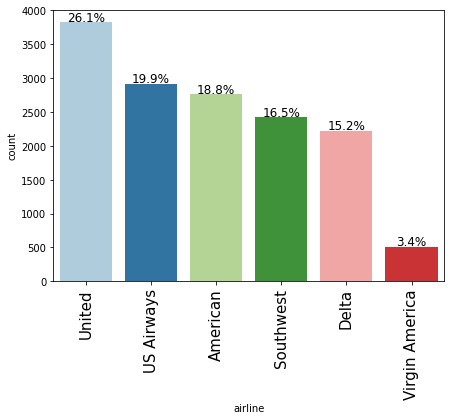

In [15]:
# perc=False shows the number of each value at the column, with True only the percentage. 
labeled_barplot(data, 'airline', perc=True, n=None)

In [16]:
data.airline.value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

**Observations**

* 26.1% of the whole tweets dataset (3822 tweets) refer to comments for United Airlines.
* Second and with 19.9% and 2913 tweets are for US Airways.
* Less percentage 3.4% and 504 tweets are for Virgin America.

#### What is the distribution of sentiments across all the tweets?

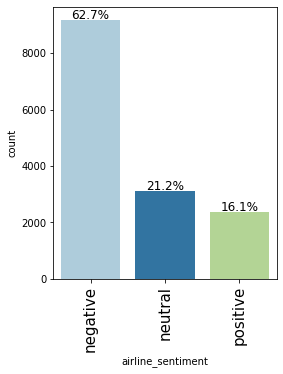

In [17]:
labeled_barplot(data, 'airline_sentiment', perc=True, n=None)

In [18]:
data.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

**Observations**

* 62.7% of the whole tweets dataset (9178 tweets) refer to negative comments as expected.
* Second and with 21.2% and 3099 tweets with neutral comments.
* Less percentage 16.1% and 2363 tweets with positive comments.
* As we can see people mostly using comments to complain or express their dissapointment.

#### What is the distribution of sentiments for each airline?


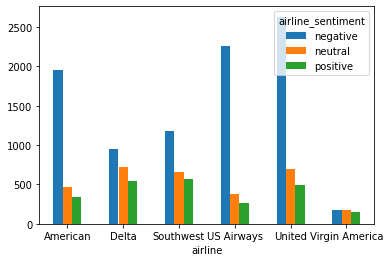

In [21]:
#data.airline(data.airline_sentiment.value_counts())

dist = pd.crosstab(index=data['airline'], columns=data['airline_sentiment'])
barplot = dist.plot.bar(rot=0)


In [22]:
print(dist)


airline_sentiment  negative  neutral  positive
airline                                       
American               1960      463       336
Delta                   955      723       544
Southwest              1186      664       570
US Airways             2263      381       269
United                 2633      697       492
Virgin America          181      171       152


**Observations**


----------------------------------------------------------
* Comments for Virgin America seems to be approximately devided in same percentage between negative neutral and positive.
* Delta and Southwest besides having more negative comments, the graph sows a better percentage of positive comments rather than the other companies.
* The percentage of negative comments For United and then for US Airways and as third for American are masive.

#### What does the plot of negative reasons indicate?


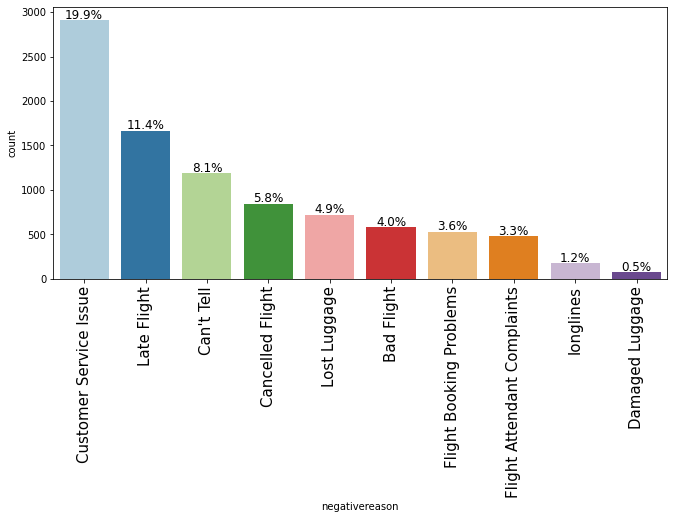

In [23]:
labeled_barplot(data, 'negativereason', perc=True, n=None)

In [24]:
data.negativereason.value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

**Observation**

-------------------------------------------------------

* We can conlude that **customer service issue** & **late fight**  were the major negative sentiment reasons.

#### How does a wordcloud appear for negative tweets?


In [26]:
import wordcloud
def show_wordcloud(data, title):
    word = ' '.join(data['text'].astype(str).tolist())                 # Converting Summary column into list
    stopwords = set(wordcloud.STOPWORDS)                                  # instantiate the stopwords from wordcloud
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',          # Setting the different parameter of stopwords
                    colormap='viridis', width=800, height=600).generate(word)
    
    plt.figure(figsize=(14,11), frameon=True)                             
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

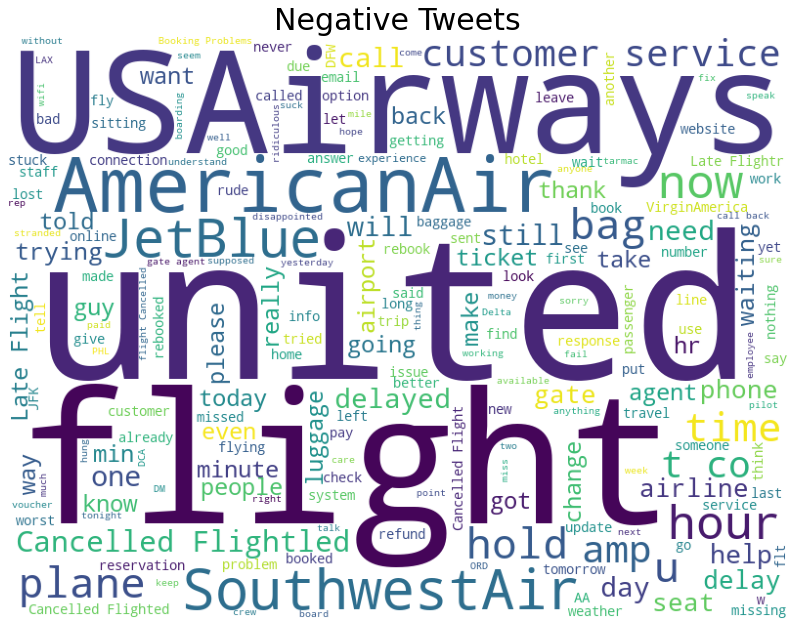

In [27]:
show_wordcloud(data[data.airline_sentiment == 'negative'], title = "Negative Tweets")

#### How does a wordcloud appear for positive tweets?


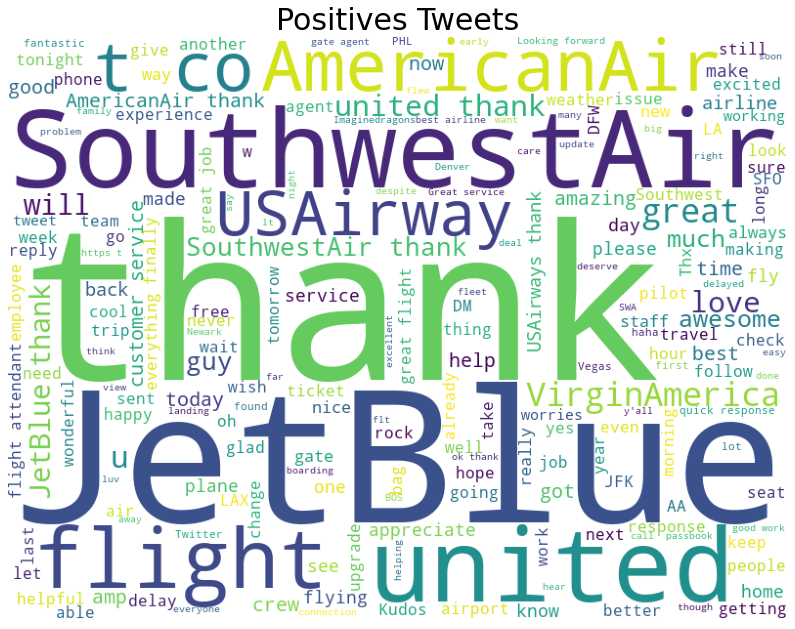

In [28]:
show_wordcloud(data[data.airline_sentiment == 'positive'], title = "Positives Tweets")

#### What are insights observed from EDA?

**EDA Observations**

------------------------------------------------
* Before starting with data preparation and modeling and as expected the wordcloud for negative nad positive comments are mostly name of the Company or usually common words.
* The dataset with tweets have mostly negative comments.
* Most of the negative comments refer to customer services.


###<b> Data Preparation for modeling

- Take the relevant text and target column for sentiment analysis.

In [29]:
data = data[['airline_sentiment', 'text']]

In [30]:
data.shape

(14640, 2)

In [31]:
data.head(25)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
5,negative,@VirginAmerica seriously would pay $30 a fligh...
6,positive,"@VirginAmerica yes, nearly every time I fly VX..."
7,neutral,@VirginAmerica Really missed a prime opportuni...
8,positive,"@virginamerica Well, I didn't…but NOW I DO! :-D"
9,positive,"@VirginAmerica it was amazing, and arrived an ..."


### Data Pre-processing:

Perform the below steps for data preprocessing.
- Remove html tags.
- Replace contractions in string. (e.g. replace I'm --> I am) and so on.\
- Remove numbers.
- Tokenization
- To remove Stopwords.
- Lemmatized data
- We have used NLTK library to tokenize words , remove stopwords and lemmatize the remaining words.

#### Removing HTML Tags

In [32]:
# Remove html tags
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

data['text'] = data['text'].apply(lambda x: strip_html(x))


data.head(25)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
5,negative,@VirginAmerica seriously would pay $30 a fligh...
6,positive,"@VirginAmerica yes, nearly every time I fly VX..."
7,neutral,@VirginAmerica Really missed a prime opportuni...
8,positive,"@virginamerica Well, I didn't…but NOW I DO! :-D"
9,positive,"@VirginAmerica it was amazing, and arrived an ..."


#### Replacing Contractions

In [33]:
# Replace contractions in string
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data['text'] = data['text'].apply(lambda x: replace_contractions(x))

data.head(25)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials...
2,neutral,@VirginAmerica I did not today... Must mean I ...
3,negative,@VirginAmerica it is really aggressive to blas...
4,negative,@VirginAmerica and it is a really big bad thin...
5,negative,@VirginAmerica seriously would pay $30 a fligh...
6,positive,"@VirginAmerica yes, nearly every time I fly VX..."
7,neutral,@VirginAmerica Really missed a prime opportuni...
8,positive,"@virginamerica Well, I did not…but NOW I DO! :-D"
9,positive,"@VirginAmerica it was amazing, and arrived an ..."


#### Removing Numbers

In [34]:
# Remove numbers
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

data['text'] = data['text'].apply(lambda x: remove_numbers(x))

data.head(25)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials...
2,neutral,@VirginAmerica I did not today... Must mean I ...
3,negative,@VirginAmerica it is really aggressive to blas...
4,negative,@VirginAmerica and it is a really big bad thin...
5,negative,@VirginAmerica seriously would pay $ a flight ...
6,positive,"@VirginAmerica yes, nearly every time I fly VX..."
7,neutral,@VirginAmerica Really missed a prime opportuni...
8,positive,"@virginamerica Well, I did not…but NOW I DO! :-D"
9,positive,"@VirginAmerica it was amazing, and arrived an ..."


#### Tokenization

In [35]:
# Tokenize of the text
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

data.head(25)

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, you, have, added, com..."
2,neutral,"[@, VirginAmerica, I, did, not, today, ..., Mu..."
3,negative,"[@, VirginAmerica, it, is, really, aggressive,..."
4,negative,"[@, VirginAmerica, and, it, is, a, really, big..."
5,negative,"[@, VirginAmerica, seriously, would, pay, $, a..."
6,positive,"[@, VirginAmerica, yes, ,, nearly, every, time..."
7,neutral,"[@, VirginAmerica, Really, missed, a, prime, o..."
8,positive,"[@, virginamerica, Well, ,, I, did, not…but, N..."
9,positive,"[@, VirginAmerica, it, was, amazing, ,, and, a..."


#### Removing StopWords

In [36]:
# To remove Stopwords
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))   

In [37]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

#### Lemmatizing

In [38]:
# Lemmatized data
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)

data.head(25)

,airline_sentiment,text
0,neutral,virginamerica dhepburn say
1,positive,virginamerica plus add commercials experience ...
2,neutral,virginamerica not today must mean need take an...
3,negative,virginamerica really aggressive blast obnoxiou...
4,negative,virginamerica really big bad thing
5,negative,virginamerica seriously would pay flight seat ...
6,positive,virginamerica yes nearly every time fly vx ear...
7,neutral,virginamerica really miss prime opportunity me...
8,positive,virginamerica well notbut
9,positive,virginamerica amaze arrive hour early good


## Build the model based on **Countvectorizer** and **Random Forest**

**Bag of Words**

- Intialize countvectorizer and use it for vectorization
- Store Independent and Dependent variables
- Split the data into train and test
- Build a Random Forest model on train data
- Use Cross validation to validate the score and to find optimal n_estimators
- Plot the misclassification error for each of estimators
- Test the model on testing data
- Plot the Confusion matrix
plot word cloud for top 20 important features obtained from Count vectorizer and random forest model


In [39]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

# Keep only 5000 features as number of features will increase the processing time.
bow_vec = CountVectorizer(max_features=5000)                
data_features = bow_vec.fit_transform(data['text'])

# Convert the data features to array.
data_features = data_features.toarray()                        

In [40]:
data_features.shape

(14640, 5000)

In [42]:
# Code to get the independent variable (data_features) stored as X
X = data_features                                             

# Code to get the dependent variable (airline_sentiment) stored as Y
labels = data['airline_sentiment']
y = labels                                          

In [43]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [44]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7204918032786886


#### Optimizing the parameter: Number of trees in the random forest model(n_estimators)


In [45]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]
base_ln

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [46]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

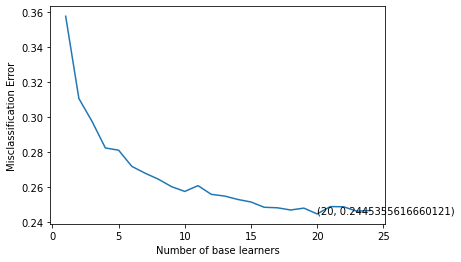

In [47]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [48]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7750455373406193

In [49]:
result =  clf.predict(X_test)

[[2574  203   37]
 [ 383  440   61]
 [ 194  110  390]]
0.7750455373406193


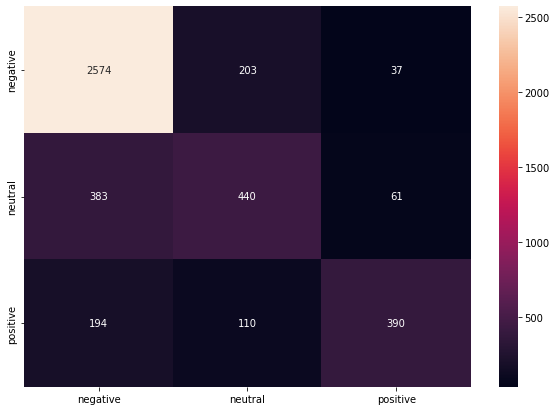

In [50]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['negative', 'neutral', 'positive']],
                  columns = [i for i in ['negative', 'neutral', 'positive']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

**Observations**


--------------------------------------------------------
* 91% of the test set can be classified as negative correctly.
* 50% as neutral
* 56% as positive.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


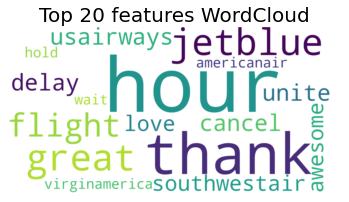

In [51]:
all_features = bow_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 20 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:20]:
    top_features+=all_features[i]
    top_features+=' '
    
    

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 20 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

**Observations**


---------------------------------------------
From the top 20 we defined, we can see Hour, **Thank** and **Great** as the most visible.

## Build the model based on **Term Frequency(TF)** - **Inverse Document Frequency(IDF)** and **Random Forest**

**Tf-Idf-Vectorizer**

- Intialize TFIDF and use it for vectorization
- Store Independent and Dependent variables
- Split the data into train and test
- Build a Random Forest model on train data
- Use Cross validation to validate the score and to find optimal n_estimators
- Plot the misclassification error for each of estimators
- Test the model on testing data
- Plot the Confusion matrix
plot word cloud for top 20 important features obtained from TFIDF and random forest model


In [52]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
data_features = vectorizer.fit_transform(data['text'])

data_features = data_features.toarray()

data_features.shape

(14640, 5000)

In [53]:
# Complete the code to get the independent variable (data_features) stored as X
X = data_features                                             

# Complete the code to get the dependent variable (airline_sentiment) stored as Y
labels = data['airline_sentiment']
y = labels   

In [54]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [55]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=5)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.6981557377049181


In [56]:
# K - Fold Cross Validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

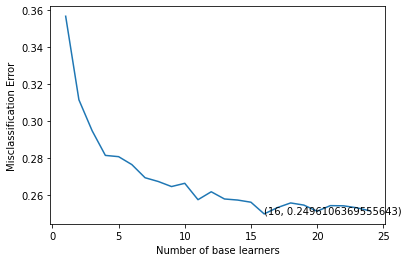

In [57]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                              #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                             #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                                        #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [58]:
# Training the best model and calculating error on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7704918032786885

In [59]:
result = clf.predict(X_test)

[[2653  121   40]
 [ 468  353   63]
 [ 239   77  378]]
0.7704918032786885


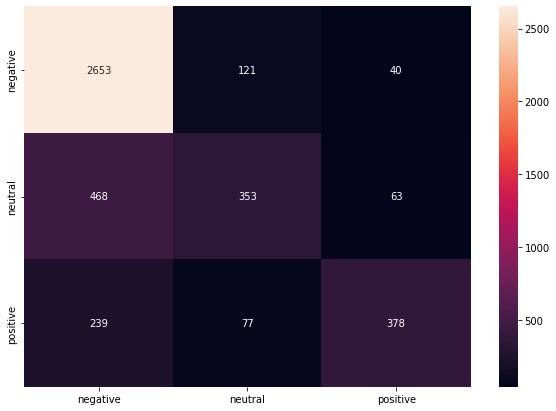

In [60]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.
result =  clf.predict(X_test)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['negative', 'neutral', 'positive']],
                  columns = [i for i in ['negative', 'neutral', 'positive']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

**Observations**

-----------------------------------------------------
* 94% was classified correctly as negtive.
* 40% as neutral.
* 55% as positive.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


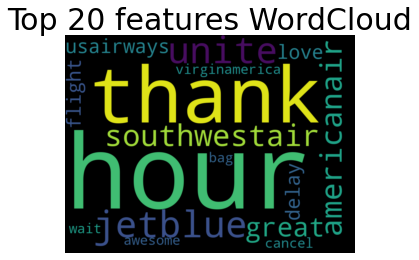

In [61]:
all_features = vectorizer.get_feature_names()                                #Instantiate the feature from the vectorizer
Top_features=''                                                              #Addition of top 20 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:20]:
    Top_features+=all_features[i]
    Top_features+=' '
    
  
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="Black",width=1000, 
                          height=750).generate(Top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(30, 30), frameon='equal')
plt.title('Top 20 features WordCloud', fontsize=30)
plt.axis("off")
plt.show()

**Observations**

--------------------------------------------------------
* From the top 20 the most visible words are **Hour**, **Thank** and then Southwestair, jetblue and unite.

## Actionable Insights and Recommendations 

---



* We used dataset which has **tweets in text format and their sentiment type (positive, negative and neutral)**.
* The goal was to **build a model for text-classification**.
* We created custom functions to **plot labeled barplots**.
* We plotted the **percentage of public tweets for each airlines**.
* We plotted the **distribution of sentiment across all the tweets**.
* We plotted the **distribution of tweets for each airline**
* We plotted the **distribution of all the negative reason** 
* We **created a word cloud plot** of positive and negative sentiment tweets.
* We **Pre-processed the data** using variuos techniques and libraries.
* The **pre-precessed data is converted to numbers (vectorized)**, so that we can feed the data in the model.
* After building the classification model, we predicted the **result for the test data**.
* We trained the model and optimize the parameter that **led to significant increase in the overall accuracy**
* We saw that using the above techniques, our model performed good in perspective of how the text classification models perform.
* We can increase the **max_feature parameter** in the vectorizer 
* we can also apply **other model and hyperparameter tuning techniques as well as other pre-processing techniques** to increase the overall accuracy even further.



## Happy Learning!